In [1]:
# Airbnb Data Preparation and Cleaning Workshop
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


df = pd.read_csv("../data/newoutput.csv")

In [2]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88940 entries, 0 to 88939
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lead_text       88484 non-null  object
 1   photo_url       88907 non-null  object
 2   title           88940 non-null  object
 3   url             88940 non-null  object
 4   wikipedia_link  88760 non-null  object
dtypes: object(5)
memory usage: 3.4+ MB


,lead_text,photo_url,title,url,wikipedia_link
0,"Domitius Marsus (/ˈmɑːrsəs/) was a Latin poet,...",http://dbpedia.org/resource/Template:EB1911_ar...,Domitius Marsus,https://dbpedia.org/page/Domitius_Marsus,http://en.wikipedia.org/wiki/Domitius_Marsus?o...
1,"Aaron ben Menahem Mendel was a Russian rabbi, ...",https://jewishencyclopedia.com/articles/69-aar...,Aaron ben Menahem Mendel,https://dbpedia.org/page/Aaron_ben_Menahem_Mendel,http://en.wikipedia.org/wiki/Aaron_ben_Menahem...
2,Ida Cook (24 August 1904 – 22 December 1986) w...,http://dbpedia.org/resource/Novelist,Mary Burchell,https://dbpedia.org/page/Mary_Burchell,http://en.wikipedia.org/wiki/Mary_Burchell?old...
3,The Principality of Lüneburg (later also refer...,http://dbpedia.org/resource/Lüneburg,Principality of Lüneburg,https://dbpedia.org/page/Principality_of_L%C3%...,http://en.wikipedia.org/wiki/Principality_of_L...
4,Simen Agdestein (born 15 May 1967) is a Norweg...,http://dbpedia.org/resource/Norway,Simen Agdestein,https://dbpedia.org/page/Simen_Agdestein,http://en.wikipedia.org/wiki/Simen_Agdestein?o...


**Check for null values**

In [3]:
df1=df[df.isna().any(axis=1)]
# df1.to_csv('out.csv', index=False)
df.isnull().sum()

lead_text         456
photo_url          33
title               0
url                 0
wikipedia_link    180
dtype: int64

**Removed null values**

In [4]:
df.dropna(subset=['lead_text'],inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 88484 entries, 0 to 88939
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lead_text       88484 non-null  object
 1   photo_url       88484 non-null  object
 2   title           88484 non-null  object
 3   url             88484 non-null  object
 4   wikipedia_link  88446 non-null  object
dtypes: object(5)
memory usage: 4.1+ MB


lead_text          0
photo_url          0
title              0
url                0
wikipedia_link    38
dtype: int64

## CSV includes symbols and non alphabetical/numbers. Hence need to remove

In [5]:
print(df['lead_text'].head(12))

0     Domitius Marsus (/ˈmɑːrsəs/) was a Latin poet,...
1     Aaron ben Menahem Mendel was a Russian rabbi, ...
2     Ida Cook (24 August 1904 – 22 December 1986) w...
3     The Principality of Lüneburg (later also refer...
4     Simen Agdestein (born 15 May 1967) is a Norweg...
5     Julia Loktev (born December 12, 1969) is a Rus...
6     Pottenstein is a town in the district of Bayre...
7     Nicolae Bălcescu (Romanian pronunciation: [nik...
8     Christos Georgiou Doumas (Greek: Χρήστος Γεωργ...
9     Baron Maejima Hisoka (前島 密, January 24, 1835 –...
10    Vander Clyde Broadway (December 19, 1899 – Aug...
11    Lars Vegard (3 February 1880 – 21 December 196...
Name: lead_text, dtype: object


In [6]:
import re

def clean_text(text):
    cleaned_text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s]", "", text)
    return cleaned_text
df['lead_text'] = df['lead_text'].apply(clean_text)
print(df['lead_text'].head(12))



0     Domitius Marsus mrss was a Latin poet friend o...
1     Aaron ben Menahem Mendel was a Russian rabbi w...
2     Ida Cook 24 August 1904  22 December 1986 was ...
3     The Principality of Lüneburg later also referr...
4     Simen Agdestein born 15 May 1967 is a Norwegia...
5     Julia Loktev born December 12 1969 is a Russia...
6     Pottenstein is a town in the district of Bayre...
7     Nicolae Blcescu Romanian pronunciation nikolae...
8     Christos Georgiou Doumas Greek    born 1933 is...
9     Baron Maejima Hisoka   January 24 1835  April ...
10    Vander Clyde Broadway December 19 1899  August...
11    Lars Vegard 3 February 1880  21 December 1963 ...
Name: lead_text, dtype: object


In [7]:
df=df.head(20)

**we use spaCy, a powerful natural language processing (NLP) library, to automatically extract entities (such as names, locations, and dates) and relationships from the text in our dataset.**


### Named Entity Recognition
**spaCy identifies specific entities like people, organizations, dates, and places from the lead_text column. The model en_core_web_sm is used for English text and contains pre-trained weights to recognize common entities.**

### Relationship Extraction
**We also analyze the text's structure to find relationships between entities, using spaCy's dependency parsing. This helps to identify how different entities (like a person and a place) are connected within the sentence.**

In [8]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply the function to the 'lead_text' column
df['entities'] = df['lead_text'].apply(extract_entities)

# Display extracted entities
df[['title', 'entities']].head(12)
# Convert the DataFrame to JSON format and save it to a file
df.to_json('../data/extracted_entities.json', orient='records', lines=True)



In [9]:
def extract_relationships(text):
    doc = nlp(text)
    relationships = []
    for token in doc:
        if token.dep_ == 'prep':
            relationships.append((token.head.text, token.text, token.head.dep_))
    return relationships

# Apply relationship extraction
df['relationships'] = df['lead_text'].apply(extract_relationships)

# Display extracted relationships
df[['title', 'relationships']].head()


,title,relationships
0,Domitius Marsus,"[(friend, of, attr), (Virgil, of, pobj), (epis..."
1,Aaron ben Menahem Mendel,"[(flourished, at, relcl), (beginning, of, pobj..."
2,Mary Burchell,"[(campaigner, for, attr), (novelist, as, conj)..."
3,Principality of Lüneburg,"[(Principality, of, nsubj), (referred, to, ROO..."
4,Simen Agdestein,"[(author, as, attr), (striker, for, pobj), (wo..."


networkx for graphs

In [10]:
import networkx as nx

# Initialize an empty graph
G = nx.Graph()

# Add entities as nodes and relationships as edges
for index, row in df.iterrows():
    for entity, label in row['entities']:
        G.add_node(entity, label=label)
    for relation in row['relationships']:
        G.add_edge(relation[0], relation[2], relation=relation[1])

# Save the graph for further use
nx.write_graphml(G, "../data/knowledge_graph.graphml")


**Tentative**
**Testing of graph construction prototype**

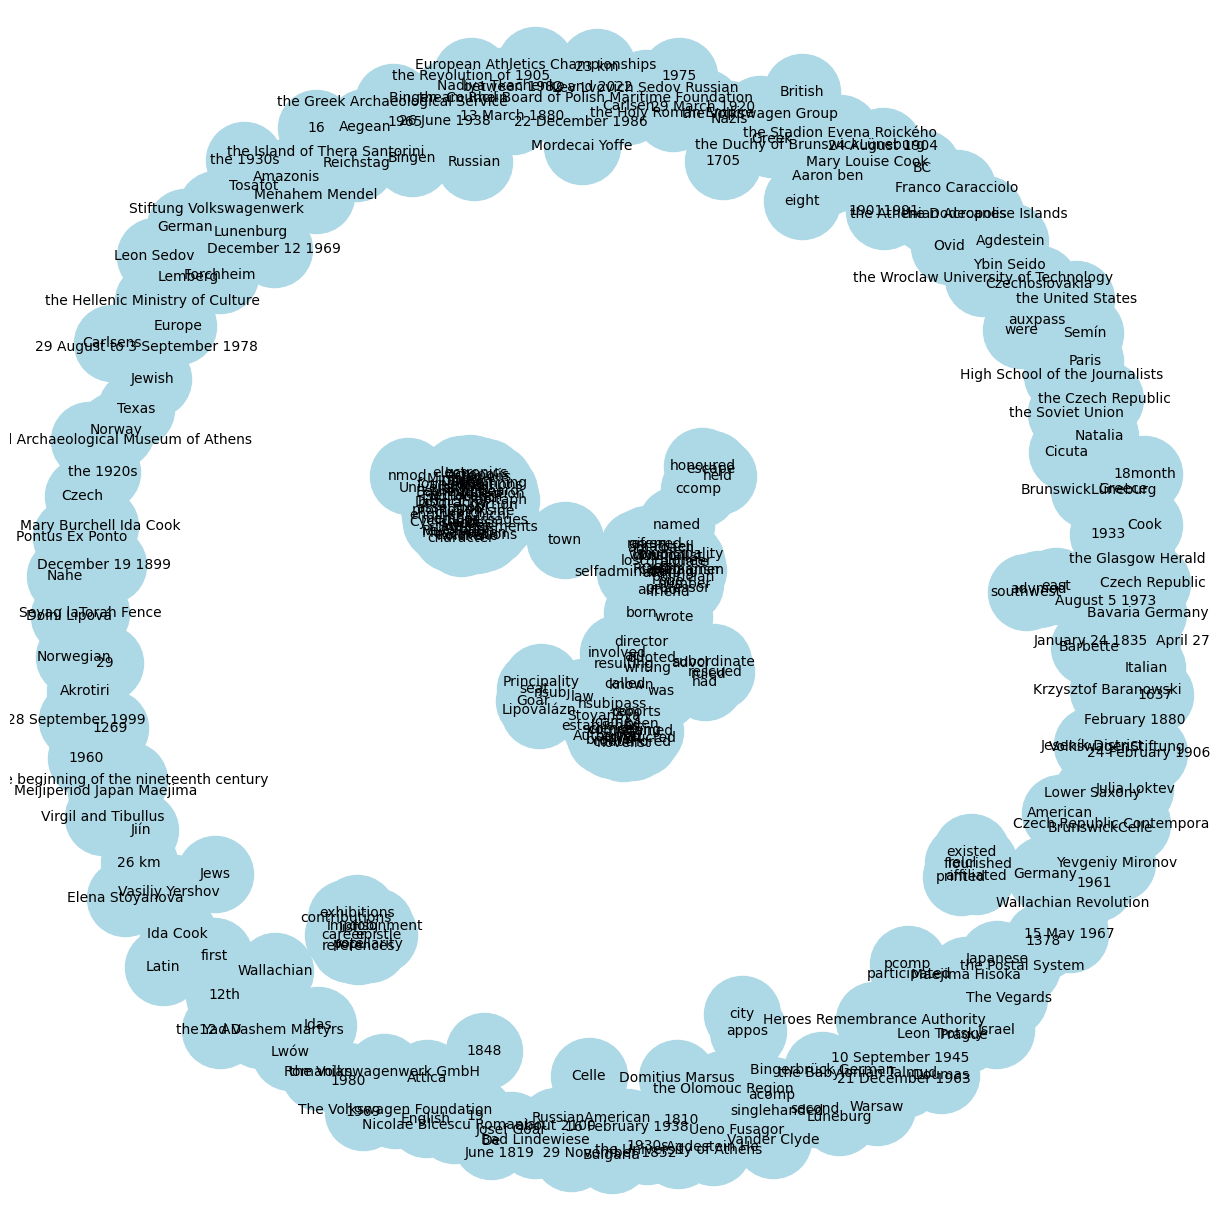

In [11]:
# Plotting the graph using Matplotlib
plt.figure(figsize=(12, 12))  # Set the figure size

# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", font_size=10, node_size=3000, edge_color="gray")

# Display the graph
plt.show()
